#### <b> Equivalent Width and Stelar Parameters </b>

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from project2 import  P, get_synth_intensity_wavelength, get_intensity_wavelength_star, growth_curve_og_opt_params, pairwise_excitment_temperature, find_solar_temperature_combinations, fwhm
from scipy.optimize import curve_fit, leastsq
from scipy.signal import convolve

In [75]:
# Definição da função gaussiana
def w_gaussian(lambdas, A, lambda_c, sigma, B):
    return A * np.exp(-((lambdas - lambda_c)**2) / (2 * sigma**2)) + B

In [76]:
def find_nearest_risca(wavelength, intensity, lambda_0, delta_lambda=0.1, threshold=0.05):
    """
    Detecta a risca mais próxima de um comprimento de onda central λ0.
    
    Parameters:
        wavelength (array): Comprimento de onda do espectro.
        intensity (array): Intensidade do espectro.
        lambda_0 (float): Comprimento de onda central estimado da risca.
        delta_lambda (float): Faixa de tolerância ao redor de λ0 (default=0.1 nm).
        threshold (float): Limite mínimo de variação relativa para detectar a risca (default=0.05).
    
    Returns:
        lambda_c (float): Comprimento de onda central da risca detectada.
        risca_found (bool): Indica se a risca foi encontrada.
    """
    # Isolar faixa de interesse ao redor de lambda_0
    mask = (wavelength >= lambda_0 - delta_lambda) & (wavelength <= lambda_0 + delta_lambda)
    wavelength_subset = wavelength[mask]
    intensity_subset = intensity[mask]
    
    # Verificar se a faixa contém dados suficientes
    if len(wavelength_subset) == 0:
        print(f"Nenhuma faixa encontrada ao redor de λ0 = {lambda_0:.2f}")
        return None, False

    # Encontrar mínimo local (risca de absorção)
    min_idx = np.argmin(intensity_subset)
    lambda_c = wavelength_subset[min_idx]
    I_continuo = max(intensity_subset)
    I_min = intensity_subset[min_idx]
    variation = (I_continuo - I_min) / I_continuo

    # Verificar se o mínimo é significativo
    if variation > threshold:
        return lambda_c
    else:
        #print(f"Variação insuficiente para detectar risca em λ0 = {lambda_0:.2f}")
        return None


In [77]:
star_1 = '../Project2/Dados_Trab2/estrela1.fits'
wv_1, flux_1 = get_intensity_wavelength_star(star_1, 4000, 7000)

In [78]:
star_2 = '../Project2/Dados_Trab2/estrela2.fits'
wv_2, flux_2 = get_intensity_wavelength_star(star_2, 4000, 6913)

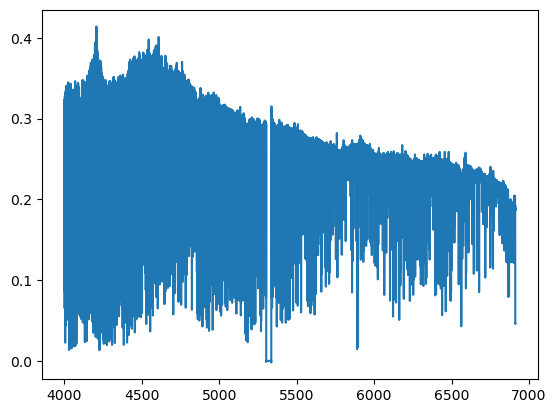

In [79]:
plt.plot(wv_1, flux_1)

In [80]:
dataframe = pd.read_csv('../Project2/Dados_Trab2/line_list_tsantaki2.csv')

In [81]:
multipletos = [(13,16), (34,39), (62,64), (109,115), (205, 207), (594,641), (816,928), (959,982), (1005,1022), (1030,1064), (1084,1108), (1143,1147), (1159,1164), (1173,1181), (1194,1197), (1225, 1234), (1255,1260), (1314,1327)]

In [82]:
multipletos

[(13, 16),
 (34, 39),
 (62, 64),
 (109, 115),
 (205, 207),
 (594, 641),
 (816, 928),
 (959, 982),
 (1005, 1022),
 (1030, 1064),
 (1084, 1108),
 (1143, 1147),
 (1159, 1164),
 (1173, 1181),
 (1194, 1197),
 (1225, 1234),
 (1255, 1260),
 (1314, 1327)]

In [83]:
optimal_params, xx, org_x, org_y, energy_potential, central_wv = growth_curve_og_opt_params(multipletos, dataframe)

In [84]:
org_x

[array([-3.317, -4.526, -5.894, -3.907]),
 array([-3.163, -5.13 , -4.81 , -4.902, -2.403, -2.563, -2.947]),
 array([-3.298, -2.877, -2.463, -3.292, -2.339]),
 array([-2.488, -2.125, -3.942, -2.929, -3.795]),
 array([-3.479, -2.397, -2.368, -2.632, -3.915, -3.377]),
 array([-2.87 , -2.644, -2.156, -2.63 ]),
 array([-1.871, -2.09 , -1.55 , -1.527, -2.301, -2.252, -1.124, -2.627,
        -1.552, -2.511, -1.24 ]),
 array([-1.928, -1.921, -1.136, -1.091, -1.776, -2.069]),
 array([-2.333, -1.417, -1.238, -1.645, -2.657, -2.075]),
 array([-1.709, -1.595, -1.986, -1.07 , -2.364, -2.187]),
 array([-1.095, -1.022, -1.419, -1.298, -0.809, -0.847, -2.164, -1.124,
        -1.622, -1.82 ]),
 array([-1.518, -0.534, -0.684, -1.051, -0.729, -1.124]),
 array([-1.319, -1.064, -1.435, -1.763, -1.402]),
 array([-1.805, -1.531, -0.404, -0.775, -1.057, -1.211, -0.326, -0.719,
        -0.124, -1.008, -1.566, -1.878, -1.475, -0.972]),
 array([-1.057, -1.045, -1.169, -1.674]),
 array([-1.797, -2.106, -2.144]),


In [85]:
energy_potential

[array([0.92, 0.86, 0.92, 0.86]),
 array([1.61, 1.49, 1.49, 1.56, 2.86, 2.81, 2.84]),
 array([2.18, 2.22, 2.2 , 2.22, 2.2 ]),
 array([2.28, 2.42, 2.28, 2.28, 2.42]),
 array([2.59, 2.61, 2.59, 2.56, 2.61, 2.56]),
 array([3.27, 3.25, 3.3 , 3.25]),
 array([3.65, 3.65, 3.69, 3.69, 3.63, 3.63, 3.63, 3.64, 3.69, 3.64, 3.65]),
 array([3.94, 3.94, 3.88, 3.93, 3.98, 3.88]),
 array([4.14, 4.14, 4.08, 4.08, 4.08, 4.08]),
 array([4.15, 4.14, 4.19, 4.22, 4.15, 4.1 ]),
 array([4.22, 4.26, 4.21, 4.21, 4.22, 4.28, 4.22, 4.22, 4.22, 4.28]),
 array([4.42, 4.42, 4.45, 4.37, 4.45, 4.37]),
 array([4.39, 4.43, 4.39, 4.47, 4.39]),
 array([4.55, 4.61, 4.55, 4.65, 4.65, 4.55, 4.65, 4.55, 4.55, 4.65, 4.65,
        4.61, 4.55, 4.61]),
 array([4.61, 4.61, 4.64, 4.61]),
 array([4.59, 4.59, 4.58]),
 array([4.79, 4.73, 4.79, 4.79]),
 array([4.99, 5.1 , 4.58])]

In [86]:
central_wv

[array([5127.36, 5956.7 , 6120.25, 6358.68]),
 array([4602.  , 5853.15, 6710.32, 6739.52, 4508.28, 4520.22, 4576.34]),
 array([6151.62, 6173.34, 6219.29, 6240.65, 6335.34]),
 array([4630.12, 5141.74, 6392.54, 6481.88, 6861.94]),
 array([6005.55, 6200.32, 6322.69, 6609.12, 6646.94, 6839.84]),
 array([4537.67, 4556.93, 4566.52, 4808.15]),
 array([4523.4 , 4596.41, 4690.14, 4802.88, 4961.92, 5223.19, 5242.5 ,
        5294.55, 5379.58, 5636.7 , 6232.65]),
 array([4551.65, 4593.53, 4885.43, 5934.66, 6096.67, 6226.74]),
 array([5811.92, 6127.91, 6157.73, 6315.81, 6745.97, 6857.25]),
 array([5386.34, 5464.28, 5473.17, 5543.94, 5815.22, 6725.36]),
 array([5228.38, 5243.78, 5522.45, 5618.64, 5638.27, 5715.09, 5738.24,
        5775.08, 5793.92, 5814.81]),
 array([5295.32, 5389.48, 5398.28, 5409.14, 5432.95, 5546.51]),
 array([5436.3 , 5560.22, 5619.6 , 5651.47, 5653.87]),
 array([5720.9 , 5855.08, 5862.36, 5905.68, 5927.79, 5929.68, 5930.19,
        5983.69, 6024.06, 6079.01, 6094.38, 6159.38, 6

In [87]:
def spectrum_central_wavelengths(central_wavelengths, star_wv, star_flux):
    star_lambda_c = []
    for i in range(len(central_wavelengths)):
        for j in range(len(central_wavelengths[i])):
            risca = find_nearest_risca(star_wv, star_flux, central_wavelengths[i][j])
            star_lambda_c.append(risca)

    # Identificar os índices das entradas que são None
    indices_to_remove = [i for i, risca in enumerate(star_lambda_c) if risca is None]

    # Remove None entries that correspond to non-existing central wavelengths
    star_lambda_c = [risca for risca in star_lambda_c if risca is not None]


    return star_lambda_c, indices_to_remove

In [88]:
star_1_lambda_c, indices = spectrum_central_wavelengths(central_wv, wv_1, flux_1)

In [89]:
indices

[2, 52, 100, 101]

In [90]:
star_2_lambda_c, indices_2 = spectrum_central_wavelengths(central_wv, wv_2, flux_2)

In [91]:
star_2_lambda_c

[5127.370165798749,
 6358.68052040373,
 4602.0098812351625,
 4508.2851824929985,
 4520.194508877499,
 4576.351332534385,
 6173.351003014714,
 6219.2884047027,
 6335.341840486499,
 4630.11829136684,
 5141.749352482973,
 6322.692555955524,
 4690.164895009932,
 5242.493654182248,
 6232.647649076916,
 5934.664503604126,
 5638.27126820282,
 5715.086923354564,
 5389.485340036275,
 5398.284842318693,
 5432.96288085895,
 5862.368592806533,
 5930.194756422035,
 5983.691730525372,
 6024.069446680376,
 5987.071539356573,
 6078.496368184013,
 5633.951512536905]

In [92]:
star_1_lambda_c

[5127.368461040728,
 5956.701196434913,
 6358.694967209653,
 4602.008084013605,
 5853.1608305746595,
 6710.318289625573,
 6739.522751645445,
 4508.285856360649,
 4520.223592633065,
 4576.332952734238,
 6151.6242335932275,
 6173.340115656618,
 6219.291402011748,
 6240.647352328231,
 6335.33939607702,
 4630.122752688676,
 5141.7457347088475,
 6392.528551418914,
 6481.8816075885825,
 6861.949536114236,
 6005.55193297346,
 6200.324998570563,
 6322.69179441487,
 6609.117480120214,
 6646.930309753614,
 6839.833729887616,
 4537.670284253974,
 4556.926632713501,
 4566.51481452694,
 4808.148993950522,
 4523.402989730744,
 4596.409145728385,
 4690.1413714854225,
 4802.879993099967,
 4961.919834712467,
 5223.180292446561,
 5242.496629530571,
 5294.54675937496,
 5379.580634581744,
 5636.691879122327,
 6232.648869063631,
 4551.647633758865,
 4593.519693649048,
 4885.434338494724,
 5934.6553769368575,
 6096.664655461341,
 6226.739989551907,
 5811.908653137481,
 6127.908730713687,
 6157.733075186566,

In [93]:
len(star_1_lambda_c)

105

In [94]:
fwhm_value_1 = fwhm(wv_1, 55000)

In [95]:
fwhm_value_1

0.09919656689355325

In [96]:
fwhm_value_2 = fwhm(wv_2, 55000)

In [97]:
fwhm_value_2

0.09920384665211766

In [98]:
double_fwhm_1 = 2 * fwhm_value_1

In [99]:
double_fwhm_2 = 2 * fwhm_value_2

In [100]:
double_fwhm_1

0.1983931337871065

In [101]:
double_fwhm_2

0.19840769330423533

In [102]:
def fit_gaussian(wavelength, intensity, lambda_c, delta_lambda=0.5):
    """
    Ajusta uma gaussiana a uma risca no espectro.

    Parameters:
        wavelength (array): Comprimento de onda do espectro.
        intensity (array): Intensidade do espectro.
        lambda_c (float): Comprimento de onda central estimado da risca.
        delta_lambda (float): Largura da faixa ao redor de λc para análise.

    Returns:
        params (tuple): Parâmetros ajustados (A, lambda_c, sigma, B).
        W_lambda (float): Largura equivalente da risca.
    """
    # Isolar faixa da risca
    mask = (wavelength >= lambda_c - delta_lambda) & (wavelength <= lambda_c + delta_lambda)
    wavelength_subset = wavelength[mask]
    intensity_subset = intensity[mask]

    # Normalizar o fluxo
    I_continuo = max(intensity_subset)
    intensity_subset_normalized = intensity_subset / I_continuo


    if len(wavelength_subset) == 0:
        raise ValueError(f"Nenhuma faixa encontrada ao redor de λc = {lambda_c:.2f}")

    # Parâmetros iniciais de acordo com os slides
    p0 = [-1, lambda_c, 0.19, 1] # 2*fwhm ~ 0.19

    # Ajuste da gaussiana
    params, _ = curve_fit(w_gaussian, wavelength_subset, intensity_subset_normalized, p0=p0)
    A, lambda_c_fit, sigma, B = params

    # Calcular largura equivalente da risca
    W_lambda = np.abs((np.sqrt(2 * np.pi) * A * sigma) / B)
    
    return params, W_lambda

In [103]:
def plot_gaussian_fit(wavelength, intensity, lambda_c, delta_lambda=0.5):
    """
    Ajusta uma gaussiana e plota a sobreposição com o espectro da estrela.

    Parameters:
        wavelength (array): Comprimento de onda do espectro.
        intensity (array): Intensidade do espectro.
        lambda_c (float): Comprimento de onda central estimado da risca.
        delta_lambda (float): Largura da faixa ao redor de λc para análise.
    """
    # Isolar a faixa ao redor de λc
    mask = (wavelength >= lambda_c - delta_lambda) & (wavelength <= lambda_c + delta_lambda)
    wavelength_subset = wavelength[mask]
    intensity_subset = intensity[mask]

    # Ajustar a gaussiana
   # Parâmetros iniciais
    p0 = [-1, lambda_c, 0.1, 1]
    popt, _ = curve_fit(w_gaussian, wavelength_subset, intensity_subset, p0=p0)
    A, mu, sigma, B = popt

    # Gerar a gaussiana ajustada para visualização
    gaussian_fit = w_gaussian(wavelength_subset, *popt)

    # Plotar o espectro original e a gaussiana ajustada
    plt.figure(figsize=(10, 6))
    plt.plot(wavelength_subset, intensity_subset, label='Espectro Original', color='black', alpha=0.7)
    plt.plot(wavelength_subset, gaussian_fit, label='Gaussiana Ajustada', color='red', linestyle='--')
    plt.title('Ajuste da Gaussiana ao Espectro da Estrela')
    plt.xlabel('Comprimento de Onda (Å)')
    plt.ylabel('Intensidade')
    plt.legend()
    plt.show()

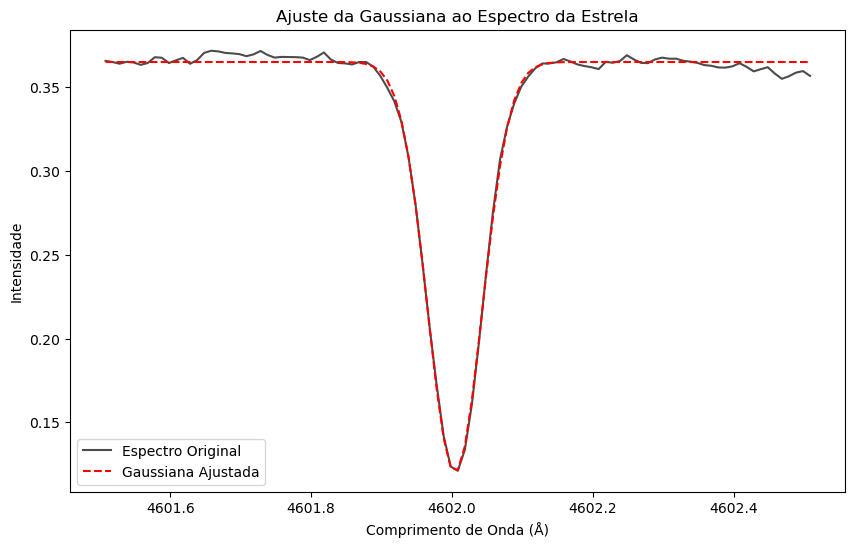

In [104]:
plot_gaussian_fit(wv_1, flux_1,star_1_lambda_c[3], delta_lambda=0.5)

<b> Equivalent Widths </b>

In [105]:
def equivalentd_widths(star_lambda_c, wv, flux):
    w_lambda_vals = []
    for i in range(len(star_lambda_c)):
        _ , w_lambda = fit_gaussian(wv, flux, star_lambda_c[i])
        w_lambda_vals.append(w_lambda)
    return w_lambda_vals

In [106]:
eq_w_1 = equivalentd_widths(star_1_lambda_c, wv_1, flux_1)

In [107]:
eq_w_1

[0.08444263357667009,
 0.046930809783868155,
 0.07431536011921554,
 0.0648849379220081,
 104.27741570679132,
 0.012051863842485631,
 0.008681659650667075,
 0.06753269593538604,
 0.060512713619092516,
 0.05004229381182058,
 0.04300436688929444,
 0.060494138108961176,
 0.08063406125922803,
 0.03808591239593762,
 0.08774750098435416,
 0.06290793858027464,
 0.07589360328412281,
 0.013308193336199906,
 0.05571585474715828,
 0.011812165302820922,
 0.01704618260552421,
 0.06434239436334402,
 0.06573672261681665,
 0.054365194368399164,
 0.00650715358087967,
 0.023695452279179748,
 0.009737883943655283,
 0.016194064136142456,
 1169.4695994062706,
 62.592223854039986,
 0.03155112265528502,
 5.62995394265225,
 0.04605710271042745,
 0.04924080387098823,
 0.018679720113500345,
 0.012849283998848876,
 0.07456296591800972,
 0.009647137884520358,
 0.051138234112883166,
 88.7868002776811,
 0.07237998624203332,
 65.8318472441621,
 22.368535979812897,
 0.1869094017203868,
 0.06582022381115833,
 0.0281148

<b> Excitation Temperature </b>

In [108]:
multipletos = [(13,16), (34,39), (62,64), (109,115), (205, 207), (594,641), (816,928), (959,982), (1005,1022), (1030,1064), (1084,1108), (1143,1147), (1159,1164), (1173,1181), (1194,1197), (1225, 1234), (1255,1260), (1314,1327)]

In [109]:
dataframe = pd.read_csv('../Project2/Dados_Trab2/line_list_tsantaki2.csv')

In [110]:
valid_combinations, multiplets = find_solar_temperature_combinations(multipletos, dataframe)

In [111]:
valid_combinations

[((34, 39), (1084, 1108)),
 ((109, 115), (1084, 1108)),
 ((109, 115), (1194, 1197)),
 ((205, 207), (1159, 1164)),
 ((959, 982), (1255, 1260)),
 ((1084, 1108), (1194, 1197))]

In [112]:
'''valid_combinations = [((13,16), (109,115)),
 ((13,16), (959,982)),
 ((13,16), (1030,1064)),
 ((13,16), (1084,1108)),
 ((13,16), (1143,1147)),
 ((13,16), (1159,1164)),
 ((13,16), (1314,1327)),
 ((62,64), (959,982)),
 ((62,64), (1159,1164)),
 ((109,115), (1030,1064)),
 ((109,115), (1084,1108)),
 ((109,115), (1314,1327)),
 ((1005,1022), (1030,1064)),
 ((1005,1022), (1173,1181)),
 ((1030,1064), (1314,1327))]'''


'valid_combinations = [((13,16), (109,115)),\n ((13,16), (959,982)),\n ((13,16), (1030,1064)),\n ((13,16), (1084,1108)),\n ((13,16), (1143,1147)),\n ((13,16), (1159,1164)),\n ((13,16), (1314,1327)),\n ((62,64), (959,982)),\n ((62,64), (1159,1164)),\n ((109,115), (1030,1064)),\n ((109,115), (1084,1108)),\n ((109,115), (1314,1327)),\n ((1005,1022), (1030,1064)),\n ((1005,1022), (1173,1181)),\n ((1030,1064), (1314,1327))]'

In [113]:
def process_multiplet(dataframe, valid_combinations, star_wv, star_flux, index, zero_or_one):

    # Get parameters based on best multiplet combinations
    _, _, log_gf, _, energy_potential, central_wv = growth_curve_og_opt_params([valid_combinations[index][zero_or_one]],dataframe)

    # Find star's corresponding central wavelengths
    star_lambda_c, indices_to_rem = spectrum_central_wavelengths(central_wv, star_wv, star_flux)
    
    # Remove non-relevant indices
    if (len(indices_to_rem) != 0):
        print(f"Removing indices {indices_to_rem}")
        log_gf = np.delete(log_gf, indices_to_rem)
        energy_potential = np.delete(energy_potential, indices_to_rem)

    # Fit gaussian based on the star's central wavelengths
    eq_widths = equivalentd_widths(star_lambda_c, star_wv, star_flux)

    # Calcular log(W_lambda / lambda)
    log_w_by_lambda = np.log10(np.array(eq_widths) / np.array(star_lambda_c))

    # Calcular log(gf * lambda)
    log_gf_lambda = np.array(log_gf) + np.log(np.array(star_lambda_c)/1000)

    # Ajustar linha reta: y = mx + b
    x = np.array(energy_potential).ravel()
    y = np.array(log_w_by_lambda - log_gf_lambda).ravel()

    # Remove nan and inf
    valid_mask = ~np.isnan(x) & ~np.isinf(x) & ~np.isnan(y) & ~np.isinf(y)
    # Apply the mask to both x and y to ensure they have the same length
    x = x[valid_mask]
    y = y[valid_mask]

    mean_ep = np.average(x)
    # Debug
    #print(f"[MULT]\nLarguras Equivalentes 1: {eq_widths}\nLambdas 1: {star_lambda_c}\nlog(gf): {log_gf}\nEnergy potentials 1: {energy_potential}\nlog_w_by_lambda: {log_w_by_lambda}\nlog_gf_lambda {log_gf_lambda}\nx1: {x}\ny1: {y}\n")

    # Ajustar a reta usando polyfit
    try:
        slope, intercept = np.polyfit(x, y, 1)
    except Exception as e:
        print(f"Error in polyfit for index {index} (zero_or_one={zero_or_one}): {e}")
        print(x)
        slope, intercept = np.nan, np.nan


    return slope, intercept, mean_ep

In [114]:
def estimate_excitation_temperature(valid_combinations, dataframe, star_wv, star_flux):
    avg_temps = []


    for i in range(len(valid_combinations)):

        # MULTIPLET 1
        slope_1, intercept_1,  ep_1 = process_multiplet(dataframe,valid_combinations, star_wv, star_flux, i, 0)
        # Verifica se a primeira combinação foi processada com sucesso
        if np.isnan(slope_1) or np.isnan(intercept_1):
            continue  # Se houver erro ignora o índice
        
        # MULTIPLET 2
        slope_2, intercept_2, ep_2= process_multiplet(dataframe, valid_combinations, star_wv, star_flux, i, 1)
        
        if np.isnan(slope_2) or np.isnan(intercept_2):
            continue  

        delta = np.sqrt((slope_1 - slope_2)**2 + (intercept_1 - intercept_2)**2) #Δ= sqrt( (m1​−m2​)^2+(b1​−b2​)^2 )
        t_exc = np.abs(5040 * (ep_1 -ep_2)) / delta

        avg_temps.append(t_exc)
    return avg_temps

In [115]:
temps = estimate_excitation_temperature(valid_combinations, dataframe, wv_1, flux_1)

In [116]:
temps

[5605.8216897979355,
 5478.396783923666,
 53.82893213737188,
 23539.477189610472,
 101.80421190918621,
 9.120130379770787]

In [117]:
avg_temp = np.average(temps)

In [118]:
avg_temp

5798.074822959734

In [119]:
temps_2 = estimate_excitation_temperature(valid_combinations, dataframe, wv_2, flux_2)

Removing indices [1, 2, 3]
Removing indices [0, 1, 2, 3, 6, 7, 8, 9]
Removing indices [2, 3, 4]
Removing indices [0, 1, 2, 3, 6, 7, 8, 9]
Removing indices [2, 3, 4]
Removing indices [0, 1, 2, 3]
Error in polyfit for index 2 (zero_or_one=1): expected non-empty vector for x
[]
Removing indices [0, 1, 3, 4, 5]
Removing indices [0, 1, 2, 3, 4]
Error in polyfit for index 3 (zero_or_one=1): expected non-empty vector for x
[]
Removing indices [0, 1, 2, 4, 5]
Removing indices [1, 3]
Removing indices [0, 1, 2, 3, 6, 7, 8, 9]
Removing indices [0, 1, 2, 3]
Error in polyfit for index 5 (zero_or_one=1): expected non-empty vector for x
[]


c:\Users\Rodrigo\anaconda3\envs\torchEnv\Lib\site-packages\numpy\lib\function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Rodrigo\anaconda3\envs\torchEnv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_17392\1553373913.py:40: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(x, y, 1)
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_17392\1553373913.py:40: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(x, y, 1)
C:\Users\Rodrigo\AppData\Local\Temp\ipykernel_17392\1553373913.py:40: RankWarning: Polyfit may be poorly conditioned
  slope, intercept = np.polyfit(x, y, 1)


In [120]:
temps_2

[3262.3323299999465, 1132.068020789182, 11013.087776229973]

In [121]:
avg_temps_2 = np.average(temps_2)

In [122]:
avg_temps_2

5135.829375673034

In [123]:
avg_temp

5798.074822959734

<b> Process Synthetic Spectra </b>

In [124]:
from pathlib import Path
import sys

In [125]:
# import OS module
import os
# Get the list of all files and directories
path = '../Project2/star_1_spectra'
dir_list = os.listdir(path)
print("Files and directories in '", path, "' :")
print(dir_list)


Files and directories in ' ../Project2/star_1_spectra ' :
['M_p5250g3.5z-0.50t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z-1.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z-1.50t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z-2.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z-2.50t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z-3.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z0.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z0.25t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z0.50t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z0.75t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g3.5z1.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g4.0z-0.50t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g4.0z-1.00t1.0_a0.00c0.00n0.00o0.00r0.00s0.00_VIS.spec.FITS', 'M_p5250g4.0z-1.50t1.0_a0.00c0.00n0.

In [126]:
wv_synth, flux_synth, normalyzed_synth = get_synth_intensity_wavelength(path+'/'+dir_list[220])

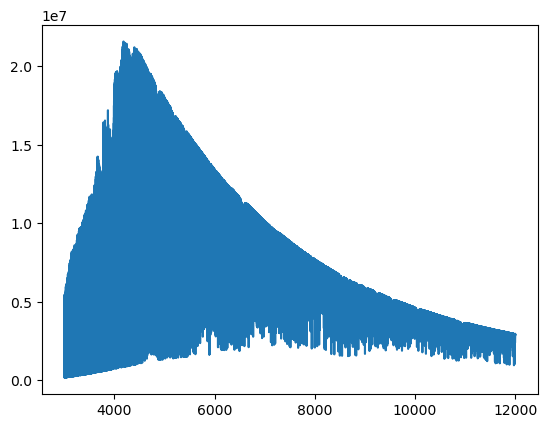

In [127]:
plt.plot(wv_synth, flux_synth)

In [146]:
xx_gauss_synth, P_synth = P(wv_synth, 55000)

In [ ]:
E_synth = convolve(flux_synth, P_synth)

In [129]:
synth_lambda_c, synth_indices = spectrum_central_wavelengths(central_wv, wv_synth, flux_synth)

In [130]:
synth_indices

[]

In [134]:
# indices from observed s+ectrum to remove from list of riscas
indices

[2, 52, 100, 101]

In [135]:
central_wv

[array([5127.36, 5956.7 , 6120.25, 6358.68]),
 array([4602.  , 5853.15, 6710.32, 6739.52, 4508.28, 4520.22, 4576.34]),
 array([6151.62, 6173.34, 6219.29, 6240.65, 6335.34]),
 array([4630.12, 5141.74, 6392.54, 6481.88, 6861.94]),
 array([6005.55, 6200.32, 6322.69, 6609.12, 6646.94, 6839.84]),
 array([4537.67, 4556.93, 4566.52, 4808.15]),
 array([4523.4 , 4596.41, 4690.14, 4802.88, 4961.92, 5223.19, 5242.5 ,
        5294.55, 5379.58, 5636.7 , 6232.65]),
 array([4551.65, 4593.53, 4885.43, 5934.66, 6096.67, 6226.74]),
 array([5811.92, 6127.91, 6157.73, 6315.81, 6745.97, 6857.25]),
 array([5386.34, 5464.28, 5473.17, 5543.94, 5815.22, 6725.36]),
 array([5228.38, 5243.78, 5522.45, 5618.64, 5638.27, 5715.09, 5738.24,
        5775.08, 5793.92, 5814.81]),
 array([5295.32, 5389.48, 5398.28, 5409.14, 5432.95, 5546.51]),
 array([5436.3 , 5560.22, 5619.6 , 5651.47, 5653.87]),
 array([5720.9 , 5855.08, 5862.36, 5905.68, 5927.79, 5929.68, 5930.19,
        5983.69, 6024.06, 6079.01, 6094.38, 6159.38, 6

In [136]:
synth_updated = np.delete(synth_lambda_c, indices)

In [143]:
eq_widths_synth = equivalentd_widths(synth_updated, wv_synth, flux_synth)

In [144]:
eq_widths_synth

[0.10824132664986967,
 0.07349804848331995,
 0.127696111157896,
 0.09196325298193357,
 94.93743816668251,
 0.03179008679943792,
 0.033806544547530584,
 0.10191149334465238,
 0.21559044191193796,
 0.07905696159243761,
 0.0778097257846825,
 0.09241744331829943,
 0.11890220256679035,
 0.07227292907306589,
 0.13068433391526887,
 0.08703652602288443,
 0.11739546873903907,
 0.03806614679400173,
 0.08737380758433282,
 0.06379804771730918,
 0.04817118302604159,
 0.10013827605476108,
 0.09967998981624496,
 0.0923306768311366,
 0.02575801708631471,
 0.055284798785269706,
 0.9212223503588405,
 0.05604726467256719,
 15.49147579296972,
 50.57315365006934,
 0.06355955082447867,
 0.28883360303817335,
 0.15291790135919764,
 0.08498081826277999,
 0.08456743793399542,
 0.026683857828588186,
 0.11665130589852814,
 83.28368131330848,
 0.08964888970211386,
 58.01620371959166,
 0.11271741499596902,
 67.05456468655692,
 0.038762720278072184,
 50.011353640711036,
 0.10541834840432204,
 0.0715482227782248,
 0.